# Лабораторна робота 3

## Злиття датафреймів, агрегування даних та візуалізація даних

### Мета роботи: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних

#### _Виконав студент групи КН-221а Чередниченко Максим_

In [36]:
import pandas as pd
import numpy as np

# 1 Завантаження даних та вивід у DataFrame
Energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

# 2 Переведення данних із 'Energy Supply' в ГДж
Energy['Energy Supply'] = Energy['Energy Supply'].apply(lambda x: np.nan if x == '...' else x * 1_000_000)
Energy = Energy.replace('...', np.nan)

# 3 Перейменування країн
country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America20": "United States",
    "United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

Energy['Country'] = Energy['Country'].str.strip()
Energy['Country'] = Energy['Country'].replace(country_rename)


# 4 Видалення цифр та дужок з назв країн
Energy['Country'] = Energy['Country'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
Energy['Country'] = Energy['Country'].apply(lambda x: x.split('(')[0].strip())

Energy.loc[Energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]


,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353


In [37]:
# 5 Завантаження даних про ВВП та перейменування країн
GDP = pd.read_csv('gpd.csv', skiprows=4)

country_rename_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GDP['Country Name'] = GDP['Country Name'].replace(country_rename_gdp)

GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [38]:
# 6 Завантаження даних з файлу „scimagojr.xlsx”
scimagojr = pd.read_excel('scimagojr.xlsx')

# 7 Об'єднання трьох наборів даних
merged_data = pd.merge(pd.merge(scimagojr[:15], Energy, on='Country'),
                       GDP, left_on='Country', right_on='Country Name')

columns_to_keep = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                   'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + list(map(str, range(2006, 2016)))
merged_data = merged_data[columns_to_keep]

merged_data = merged_data.set_index('Country')

merged_data

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [39]:
# 8 Функція, що повертає середнє значення ВВП за останні 10 років

def task_eight(data):
    gdp_columns = list(map(str, range(2006, 2016)))
    
    average_gdp = data[gdp_columns].mean(axis=1)
    
    result_series = average_gdp.sort_values(ascending=False)
    
    return result_series

task_eight(merged_data)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [40]:
# 9 Функція, що повертає назву країни з 5-м середнім значенням ВВП за останні 10 років та різницю між 2006 та 2015 роками
def task_nine(data):
    fifth_country = data.mean(axis=1).sort_values(ascending=False).index[4]
    
    gdp_values = data.loc[fifth_country, ['2006', '2015']]

    gdp_change = gdp_values.iloc[1] - gdp_values.iloc[0]

    return (fifth_country, gdp_change)

task_nine(merged_data)

('France', 153345695364.24023)

In [41]:
# 10 Функція, що повертає назву країни з максимальним відсотком поновлюваних джерел енергії та сам відсоток
def task_ten(data):
    max_renewable_country = data['% Renewable'].idxmax()
    
    max_renewable_percentage = data.loc[max_renewable_country, '% Renewable']

    return (max_renewable_country, max_renewable_percentage)

task_ten(merged_data)


('Brazil', 69.64803)

In [42]:
# 11 Функція, що повертає назву країни з шостим за чисельністю населення та саму чисельність (приблизну)
def task_eleven(data):
    data['Population Estimate'] = data['Energy Supply'] / data['Energy Supply per Capita']

    sixth_country_population = data['Population Estimate'].sort_values(ascending=False).index[5]

    return (sixth_country_population, data.loc[sixth_country_population, 'Population Estimate'])

task_eleven(merged_data)

('Japan', 127409395.97315437)

In [43]:
# 12 Функція, що повертає кореляцію між чисельністю населення та кількістю цитувань на документ
def task_twelve(data):
    data['Citations per Capita'] = data['Citable documents'] / (data['Energy Supply'] / data['Energy Supply per Capita'])

    correlation = data['Citations per Capita'].corr(data['Energy Supply per Capita'])

    return correlation

task_twelve(merged_data)

0.7940010435442946

In [44]:
# 13 Функція, що створює новий стовпець, який вказує, чи країна має велику частку відновлюваної енергії (більше або дорівнює медіані)
def task_thirteen(data):
    renewable_median = data['% Renewable'].median()

    data['High Renewable'] = data['% Renewable'].apply(lambda x: 1 if x >= renewable_median else 0)

    return data.sort_values(by='Rank')['High Renewable']

task_thirteen(merged_data)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int64

In [45]:
# 14 Функція, що створює новий стовпець, який вказує на континент, до якого відноситься країна
def task_fourteen(data):
    ContinentDict = {'China':'Asia',
                     'United States':'North America',
                     'Japan':'Asia',
                     'United Kingdom':'Europe',
                     'Russian Federation':'Europe',
                     'Canada':'North America',
                     'Germany':'Europe',
                     'India':'Asia',
                     'France':'Europe',
                     'South Korea':'Asia',
                     'Italy':'Europe',
                     'Spain':'Europe',
                     'Iran':'Asia',
                     'Australia':'Australia',
                     'Brazil':'South America'}

    data['Continent'] = data.index.map(ContinentDict)

    result_df = data.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

    result_df.columns = ['size', 'sum', 'mean', 'std']

    result_df = result_df.loc[['Asia', 'Australia', 'Europe', 'North America', 'South America']]

    return result_df

task_fourteen(merged_data)

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


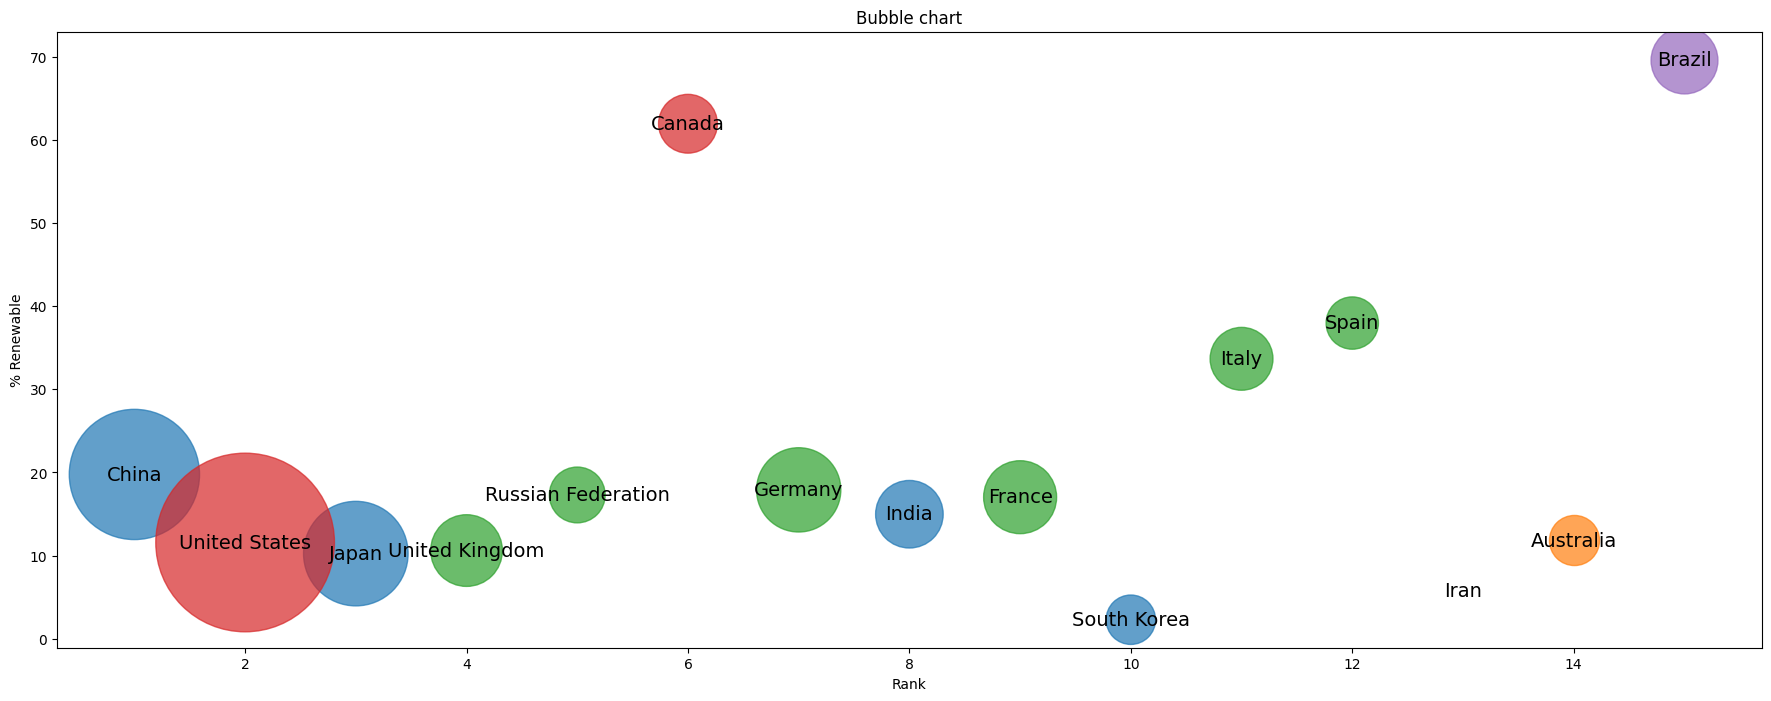

In [46]:
# 15 Створення бульбашкової діаграми
import matplotlib.pyplot as plt

ContinentDict = {'China':'Asia',
                     'United States':'North America',
                     'Japan':'Asia',
                     'United Kingdom':'Europe',
                     'Russian Federation':'Europe',
                     'Canada':'North America',
                     'Germany':'Europe',
                     'India':'Asia',
                     'France':'Europe',
                     'South Korea':'Asia',
                     'Italy':'Europe',
                     'Spain':'Europe',
                     'Iran':'Asia',
                     'Australia':'Australia',
                     'Brazil':'South America'}

merged_data['Continent'] = merged_data.index.map(ContinentDict)

plt.figure(figsize=(22, 8))
for continent, data in merged_data.groupby('Continent'):
    plt.scatter(data['Rank'], data['% Renewable'], s=data['2015'] / 1e9, alpha=0.7)
for i, country in enumerate(merged_data.index):
    plt.text(merged_data['Rank'][country], merged_data['% Renewable'][country], country, ha='center', va='center', fontsize=14)

plt.title('Bubble chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

plt.show()